
Project: Implementing a data analysis platform for sales analysis
Objective: Process and analyse large volumes of retail sales data to drive analysis for business making

In [430]:
# 1. Load the Data
# 2. Clean the Data
# 3. Transform the Data
# 4. Explore the Data
# 5. Analyze the Data
# 6. Interpret Results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) LOADING OF DATA

Explanation:
Order ID: This column represents the unique identifier for each order.
Branch Location: The location of the branch where the order was placed.
Business Name: The name of the business making the order.
Is Deleted: Indicates whether the order is deleted.
Item ID: Unique identifier for each item.
Item Name: The name of the product.
Item Price: The price of the item.
Order Item Number: A unique identifier for the order item.
Item Status: Status of the item (e.g., Cancelled).
Packed Quantity: Quantity of the item packed.
Quantity: Quantity of the item ordered.
Total Price: Total price for the ordered quantity.
Order Date: The date the order was placed.
Order Region: The region where the order was made.
Order Local Area: The local area within the region.

In [431]:

# Loading of data 

data = pd.read_csv('Dataset.csv')
print(data.head())

   Order ID Branch Location   Business Name  Is Deleted  \
0      4672           Lagos  Generic Stores       False   
1      4672           Lagos             MUL       False   
2      4671           Lagos             MUL       False   
3      4670           Lagos       TDILIFE         False   
4      4670           Lagos       TDILIFE         False   

                    Item ID                                 Item Name  \
0  60a7b0242498ec1dd380508c             Golden Penny Spaghetti - 500g   
1  6076c792a6000742949a819c             DANO COOLCOW SACHET - 12X380g   
2  6076c792a6000742949a819c             DANO COOLCOW SACHET - 12X380g   
3  608045d069c51b4e80e70343   HOLLANDIA EVAP MILK FULL CREAM 60g X 48   
4  608042a469c51b4e80e702f7  HOLLANDIA EVAP MILK FULL CREAM 190g X 24   

   Item Price         Order Item Number Item Status  Packed Quantity  \
0     4950.00  MLPLOCN1FAHUIYK50S0W9YUQ   Cancelled                1   
1     3392.75  ML1DN3SZT8R02DKKNKBLXDXA   Cancelled           

2) CLEANING OF DATA

Handled missing values (if any).
Removed duplicates from the dataset.
Ensured correct data types for columns.
Standardized formats for consistency.
Filtered out irrelevant data (e.g., deleted records).

In [432]:
#Handled missing values (if any).
missing_values = data.isnull().sum()
print(missing_values)

Order ID               0
Branch Location        0
Business Name          0
Is Deleted             0
Item ID                0
Item Name              0
Item Price             0
Order Item Number      0
Item Status            0
Packed Quantity        0
Quantity               0
Total Price            0
Order Date             0
Order Region         157
Order Local Area     874
dtype: int64


In [433]:
#Checking for duplicates.
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 2


In [434]:
# Convert Date Column to DateTime Format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')

In [435]:
# Ensure that columns like Item Price, Quantity, and Total Price are in the correct numerical format.

data['Item Price'] = pd.to_numeric(data['Item Price'], errors='coerce')

data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

data['Total Price'] = pd.to_numeric(data['Total Price'], errors='coerce')

In [436]:
# Standardize Text Columns

# Capitalize each word
data['Branch Location'] = data['Branch Location'].str.title()  

# Remove any leading/trailing whitespace
data['Business Name'] = data['Business Name'].str.strip()  

In [437]:
# Filter out deleted records

data = data[data['Is Deleted'] == False]

print(data)

      Order ID Branch Location    Business Name  Is Deleted  \
0         4672           Lagos   Generic Stores       False   
1         4672           Lagos              MUL       False   
2         4671           Lagos              MUL       False   
3         4670           Lagos          TDILIFE       False   
4         4670           Lagos          TDILIFE       False   
...        ...             ...              ...         ...   
3925      2210           Lagos         De Majok       False   
3926      2209           Lagos         De Majok       False   
3927      2209           Lagos  Renuzi Ventures       False   
3928      2209           Lagos  Renuzi Ventures       False   
3929      2209           Lagos  Renuzi Ventures       False   

                       Item ID                                 Item Name  \
0     60a7b0242498ec1dd380508c             Golden Penny Spaghetti - 500g   
1     6076c792a6000742949a819c             DANO COOLCOW SACHET - 12X380g   
2     6076c792a

In [438]:
# Recheck for missing values and duplicates
print(data.isnull().sum())
duplicate = data.duplicated().sum()
print(f"Number of duplicated column: {duplicate}")

# Preview the cleaned data
print(data.head())

Order ID               0
Branch Location        0
Business Name          0
Is Deleted             0
Item ID                0
Item Name              0
Item Price             0
Order Item Number      0
Item Status            0
Packed Quantity        0
Quantity               0
Total Price            0
Order Date             0
Order Region         157
Order Local Area     874
dtype: int64
Number of duplicated column: 2
   Order ID Branch Location   Business Name  Is Deleted  \
0      4672           Lagos  Generic Stores       False   
1      4672           Lagos             MUL       False   
2      4671           Lagos             MUL       False   
3      4670           Lagos         TDILIFE       False   
4      4670           Lagos         TDILIFE       False   

                    Item ID                                 Item Name  \
0  60a7b0242498ec1dd380508c             Golden Penny Spaghetti - 500g   
1  6076c792a6000742949a819c             DANO COOLCOW SACHET - 12X380g   
2  6076

3. TRANSFORM DATA

In [439]:
#Data Type Conversion: Ensured that each column has the correct data type.

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')

# Convert 'Item Price' and 'Total Price' to float
data['Item Price'] = data['Item Price'].astype(float)
data['Total Price'] = data['Total Price'].astype(float)

# Convert 'Packed Quantity' and 'Quantity' to integer
data['Packed Quantity'] = data['Packed Quantity'].astype(int)
data['Quantity'] = data['Quantity'].astype(int)

# Check the data types after conversion
print(data.dtypes)

Order ID                      int64
Branch Location              object
Business Name                object
Is Deleted                     bool
Item ID                      object
Item Name                    object
Item Price                  float64
Order Item Number            object
Item Status                  object
Packed Quantity               int64
Quantity                      int64
Total Price                 float64
Order Date           datetime64[ns]
Order Region                 object
Order Local Area             object
dtype: object


In [440]:
#Data Filtering: Removed irrelevant or unwanted data, like deleted orders.

# Filter out deleted orders
data = data[data['Is Deleted'] == False]

# Drop the 'Is Deleted' column if it's no longer needed
data = data.drop(columns=['Is Deleted'])

In [441]:


# Example: Filter data for a specific region (e.g., Lagos)
lagos_data = data[data['Order Region'] == 'Lagos']

# Example: Filter data for a specific time period (e.g., orders in 2021)
data_2021 = data[data['Order Date'].dt.year == 2021]

print(lagos_data)

      Order ID Branch Location    Business Name                   Item ID  \
0         4672           Lagos   Generic Stores  60a7b0242498ec1dd380508c   
1         4672           Lagos              MUL  6076c792a6000742949a819c   
2         4671           Lagos              MUL  6076c792a6000742949a819c   
3         4670           Lagos          TDILIFE  608045d069c51b4e80e70343   
4         4670           Lagos          TDILIFE  608042a469c51b4e80e702f7   
...        ...             ...              ...                       ...   
3925      2210           Lagos         De Majok  5fd7ba3a09e73f2f7a58c8ce   
3926      2209           Lagos         De Majok  5fd7c07409e73f2f7a58c910   
3927      2209           Lagos  Renuzi Ventures  5fca12e83262da995e0d1a7a   
3928      2209           Lagos  Renuzi Ventures  5fca12e83262da995e0d1a7a   
3929      2209           Lagos  Renuzi Ventures  5fca12e83262da995e0d1a7a   

                                     Item Name  Item Price  \
0            

In [442]:
#Missing Data Handling: Checked for and addressed any missing or anomalous data.

# Check for missing data
print(data.isnull().sum())

# Example: Fill missing 'Total Price' with the calculated value
data['Total Price'] = data['Item Price'] * data['Quantity']

print(data['Total Price'])

Order ID               0
Branch Location        0
Business Name          0
Item ID                0
Item Name              0
Item Price             0
Order Item Number      0
Item Status            0
Packed Quantity        0
Quantity               0
Total Price            0
Order Date             0
Order Region         157
Order Local Area     874
dtype: int64
0          4950.00
1          6785.50
2          3392.75
3          3370.00
4          4845.00
           ...    
3925    1840000.00
3926      78500.00
3927      15000.00
3928      15000.00
3929      15000.00
Name: Total Price, Length: 3930, dtype: float64


4. EXPLORE THE DATA

In [443]:
# Get a summary of the dataset, including count, mean, standard deviation, minimum, and maximum values for each numeric column.

# Descriptive statistics
print(data.describe())

          Order ID     Item Price  Packed Quantity     Quantity   Total Price  \
count  3930.000000    3930.000000      3930.000000  3930.000000  3.930000e+03   
mean   3304.601527    7639.622204        55.978372    56.686768  4.537087e+05   
min    2209.000000       0.000000         0.000000     1.000000  0.000000e+00   
25%    2583.000000    3100.000000         1.000000     2.000000  8.982000e+03   
50%    3260.500000    7820.000000         5.000000     5.000000  2.156250e+04   
75%    3923.750000    9344.500000        20.000000    20.000000  1.225000e+05   
max    4672.000000  485000.000000      8306.000000  8306.000000  7.599990e+07   
std     732.870008   17087.411311       246.356878   246.405187  2.135399e+06   

                          Order Date  
count                           3930  
mean   2021-04-24 13:11:27.022900480  
min              2021-02-01 00:00:00  
25%              2021-03-30 00:00:00  
50%              2021-05-05 00:00:00  
75%              2021-05-20 00:00:00

In [444]:
# Identify if there are any missing values in the dataset.

# Check for missing values
print(data.isnull().sum())

Order ID               0
Branch Location        0
Business Name          0
Item ID                0
Item Name              0
Item Price             0
Order Item Number      0
Item Status            0
Packed Quantity        0
Quantity               0
Total Price            0
Order Date             0
Order Region         157
Order Local Area     874
dtype: int64


In [445]:
#Data Distribution
# Understand the distribution of key columns like Item Price, Quantity, and Total Price.

# Distribution of Item Price
print(data['Item Price'].describe())


# Distribution of Quantity
print(data['Quantity'].describe())


# Distribution of Total Price
print(data['Total Price'].describe())

count      3930.000000
mean       7639.622204
std       17087.411311
min           0.000000
25%        3100.000000
50%        7820.000000
75%        9344.500000
max      485000.000000
Name: Item Price, dtype: float64
count    3930.000000
mean       56.686768
std       246.405187
min         1.000000
25%         2.000000
50%         5.000000
75%        20.000000
max      8306.000000
Name: Quantity, dtype: float64
count    3.930000e+03
mean     4.537087e+05
std      2.135399e+06
min      0.000000e+00
25%      8.982000e+03
50%      2.156250e+04
75%      1.225000e+05
max      7.599990e+07
Name: Total Price, dtype: float64


In [463]:
# Frequency Counts
# Analyze the frequency of categorical variables like Branch Location, Business Name, and Item Status.

# Frequency of Branch Locations
print(data['Branch Location'].value_counts())

# Frequency of Item Status
print(data['Item Status'].value_counts())

Branch Location
Lagos    3825
Oyo        94
Ogun       11
Name: count, dtype: int64
Item Status
Cancelled         2041
Delivered         1657
InvalidOrder       227
FailedDelivery       4
Packed               1
Name: count, dtype: int64


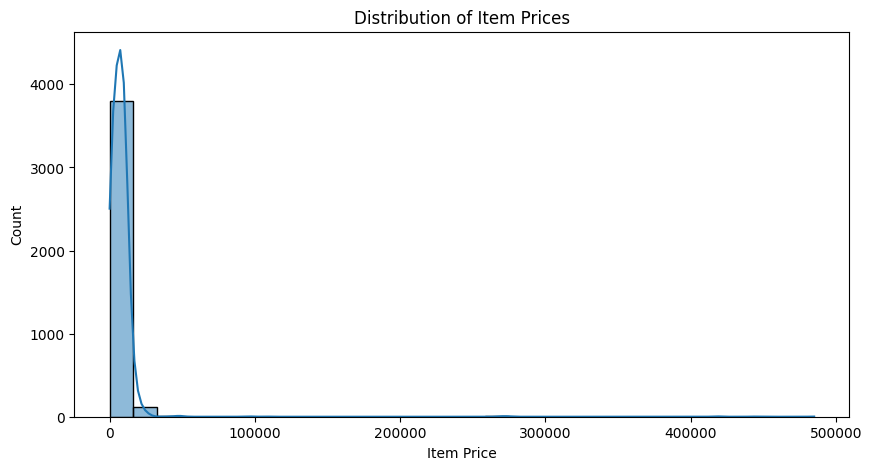

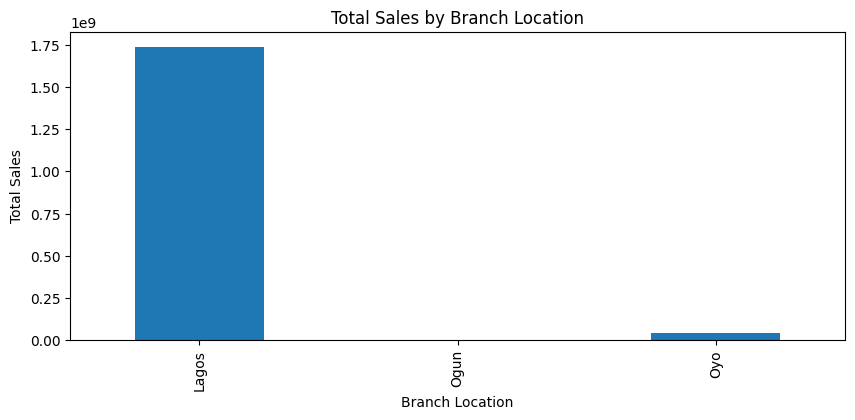

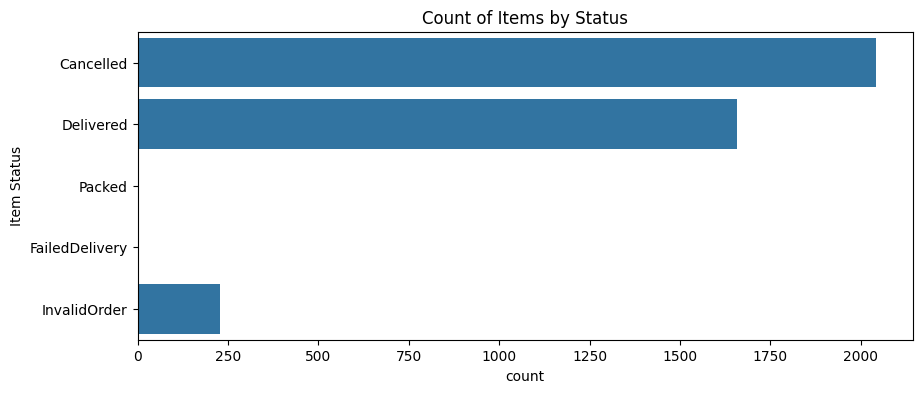

In [464]:
# Data Visualization
# Create visualizations to better understand patterns and relationships within the data.

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Item Prices
plt.figure(figsize=(10, 5))
sns.histplot(data['Item Price'], bins=30, kde=True)
plt.title('Distribution of Item Prices')
plt.show()

# Sales by Branch Location
plt.figure(figsize=(10, 4))
data.groupby('Branch Location')['Total Price'].sum().plot(kind='bar')
plt.title('Total Sales by Branch Location')
plt.ylabel('Total Sales')
plt.show()

# Item Status Count
plt.figure(figsize=(10, 4))
sns.countplot(data['Item Status'])
plt.title('Count of Items by Status')
plt.show()


             Item Price  Quantity  Total Price
Item Price     1.000000  0.004904     0.350250
Quantity       0.004904  1.000000     0.842625
Total Price    0.350250  0.842625     1.000000


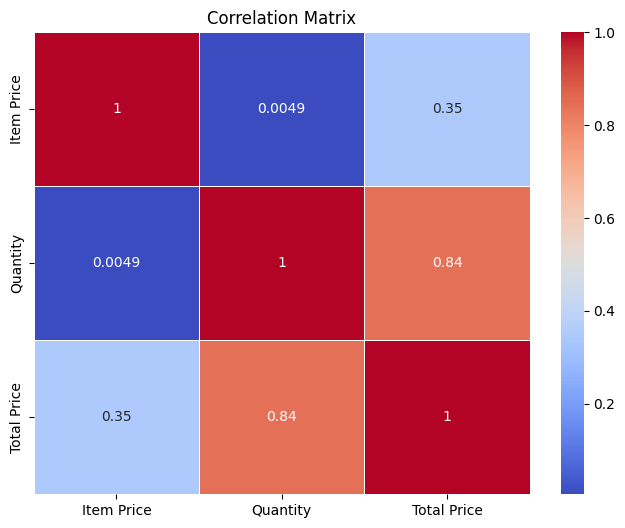

In [465]:
# Correlation Analysis
# Explore correlations between numeric variables like Item Price, Quantity, and Total Price.

# Correlation matrix
correlation_matrix = data[['Item Price', 'Quantity', 'Total Price']].corr()
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [466]:
# Group and Aggregate Data
# Group the data by relevant categories to gain insights. For example, sum the Total Price by Branch Location or Order Date.

# Total Sales by Branch Location
sales_by_location = data.groupby('Branch Location')['Total Price'].sum()
print(sales_by_location)

# Total Sales by Order Date
sales_by_date = data.groupby('Order Date')['Total Price'].sum()
print(sales_by_date)


Branch Location
Lagos    1.741892e+09
Ogun     4.434090e+05
Oyo      4.073995e+07
Name: Total Price, dtype: float64
Order Date
2021-02-01    6.343500e+06
2021-02-02    2.553400e+06
2021-02-03    2.302000e+05
2021-02-04    1.322900e+06
2021-02-05    1.758400e+07
                  ...     
2021-05-27    9.983127e+06
2021-05-28    5.608079e+07
2021-05-29    2.201128e+06
2021-05-30    1.328480e+07
2021-05-31    3.672717e+07
Name: Total Price, Length: 108, dtype: float64


5. ANALYZE THE DATA

In [467]:
# Descriptive Statistics

# Summary statistics for numeric columns
print(data.describe(include='all'))


           Order ID Branch Location    Business Name  \
count   3930.000000            3930             3930   
unique          NaN               3               23   
top             NaN           Lagos  Renuzi Ventures   
freq            NaN            3825             1224   
mean    3304.601527             NaN              NaN   
min     2209.000000             NaN              NaN   
25%     2583.000000             NaN              NaN   
50%     3260.500000             NaN              NaN   
75%     3923.750000             NaN              NaN   
max     4672.000000             NaN              NaN   
std      732.870008             NaN              NaN   

                         Item ID               Item Name     Item Price  \
count                       3930                    3930    3930.000000   
unique                       505                     453            NaN   
top     606c7b1069c51b4e80e6f6a0  NESTLE GOLDEN MORN 50G            NaN   
freq                       

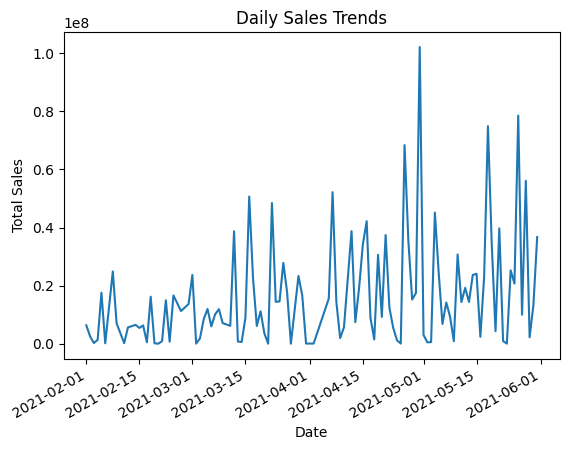

In [468]:
# Sales Trends Analysis

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')

# Group by date and sum total sales
daily_sales = data.groupby('Order Date')['Total Price'].sum()

# Plot daily sales trends
import matplotlib.pyplot as plt

daily_sales.plot(kind='line', title='Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


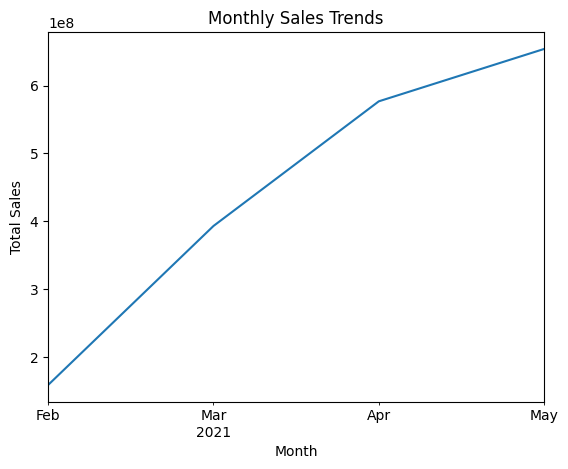

In [469]:
# Monthly Sales Trends

# Extract month and year from 'Order Date'
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Group by month and year and sum total sales
monthly_sales = data.groupby('YearMonth')['Total Price'].sum()

# Plot monthly sales trend 
monthly_sales.plot(kind='line', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [470]:
# Product Performance Analysis

# Group by 'Item Name' and sum total sales
product_sales = data.groupby('Item Name')['Total Price'].sum()

# Sort products by total sales in descending order
top_products = product_sales.sort_values(ascending=False)

# Display top 10 products
print(top_products.head(10))


Item Name
Milo Sachet 20g                      284732521.0
Knorr Chicken 17x50x8g               168711874.0
Maize                                115673000.0
Milo 20g                             104828250.0
Close Up Ever Fresh Red Hot 140g      73667378.0
MILO - 240x20g                        63700000.0
Soybean                               62580000.0
Milo Refill Pack - 450g               61843350.0
NESTLE GOLDEN MORN 50G                59559096.0
3CROWNS EVAPORATED -TIN 24 X 160g     46576220.0
Name: Total Price, dtype: float64


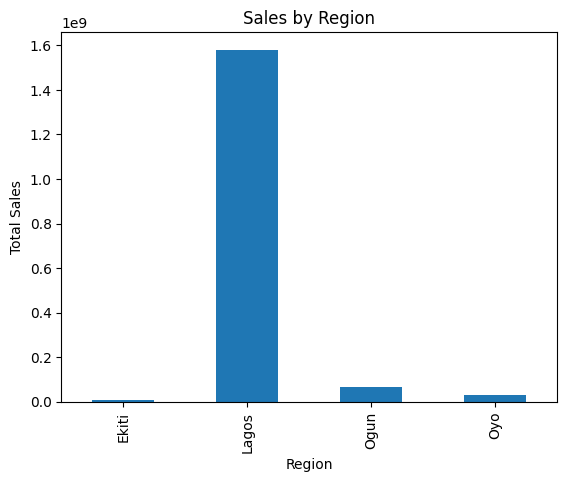

In [471]:
# Regional Analysis

# Group by 'Order Region' and sum total sales
region_sales = data.groupby('Order Region')['Total Price'].sum()

# Plot sales by region
region_sales.plot(kind='bar', title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


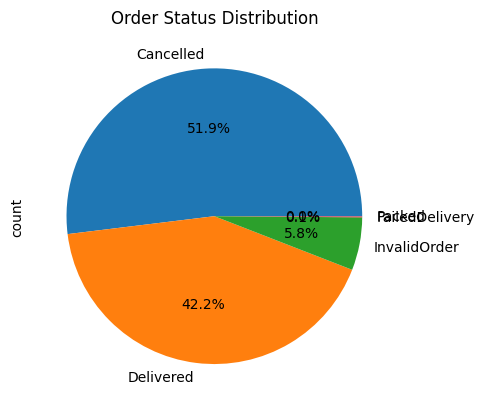

In [472]:
# Customer Behavior Analysis

# Count of orders by status
status_counts = data['Item Status'].value_counts()

# Plot order status distribution
status_counts.plot(kind='pie', autopct='%1.1f%%', title='Order Status Distribution')

plt.show()


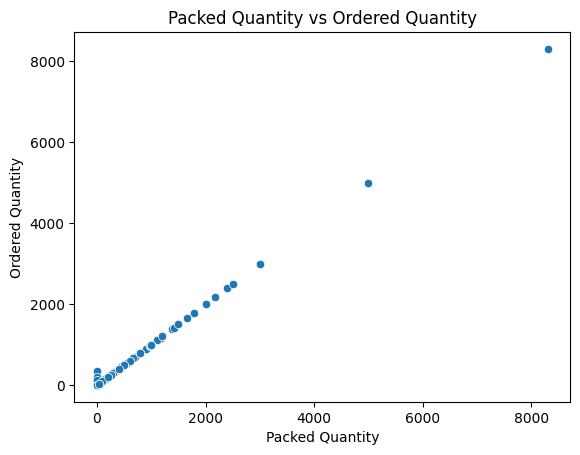

In [473]:
# Inventory Analysis

# Plot packed quantity vs ordered quantity
import seaborn as sns

sns.scatterplot(x='Packed Quantity', y='Quantity', data=data)
plt.title('Packed Quantity vs Ordered Quantity')
plt.xlabel('Packed Quantity')
plt.ylabel('Ordered Quantity')
plt.show()


6. INTERPRET RESULT


In [474]:
# Analyze Sales Trends

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Calculate total sales
total_sales = data['Total Price'].sum()

# Sales by Date
sales_by_date = data.groupby('Order Date')['Total Price'].sum().reset_index()

# Sales by Branch Location
sales_by_branch = data.groupby('Branch Location')['Total Price'].sum().reset_index()



In [475]:
# Product Performance Analysis

top_products = data.groupby('Item Name').agg({'Quantity': 'sum', 'Total Price': 'sum'}).reset_index()

top_products = top_products.sort_values(by='Total Price', ascending=False)


In [476]:
# Regional Analysis

sales_by_region = data.groupby('Order Region')['Total Price'].sum().reset_index()

sales_by_local_area = data.groupby('Order Local Area')['Total Price'].sum().reset_index()


In [477]:
# Customer Behavior Insights

order_status_counts = data['Item Status'].value_counts()


In [478]:
# Inventory and Packing Analysis

packed_vs_ordered = data.groupby('Item Name').agg({'Packed Quantity': 'sum', 'Quantity': 'sum'}).reset_index()

packed_vs_ordered['Discrepancy'] = packed_vs_ordered['Quantity'] - packed_vs_ordered['Packed Quantity']


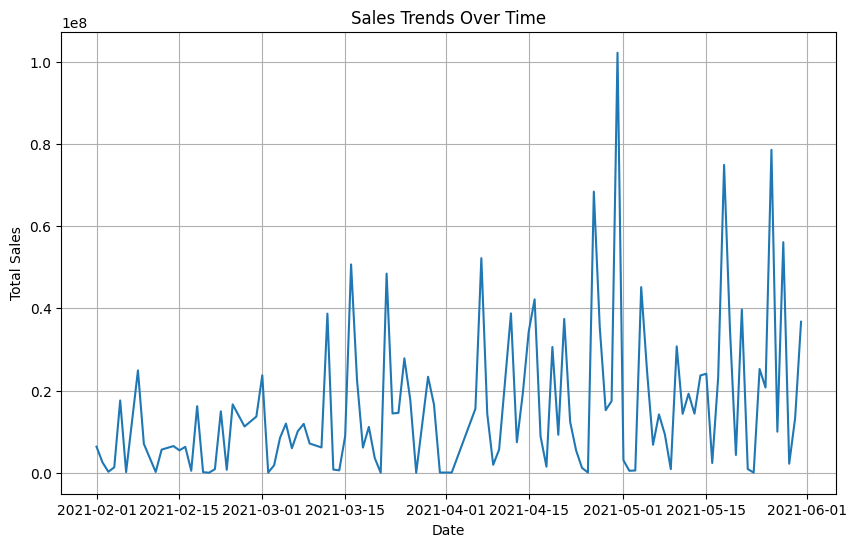

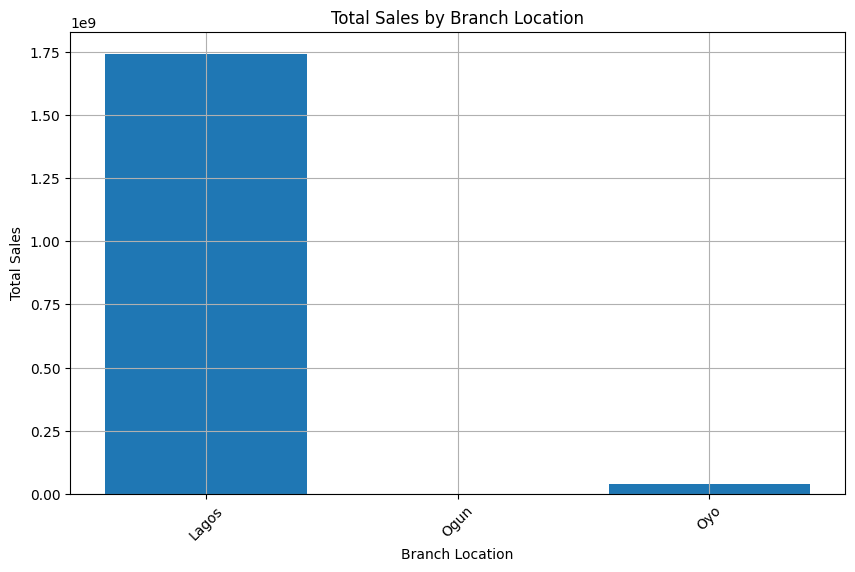

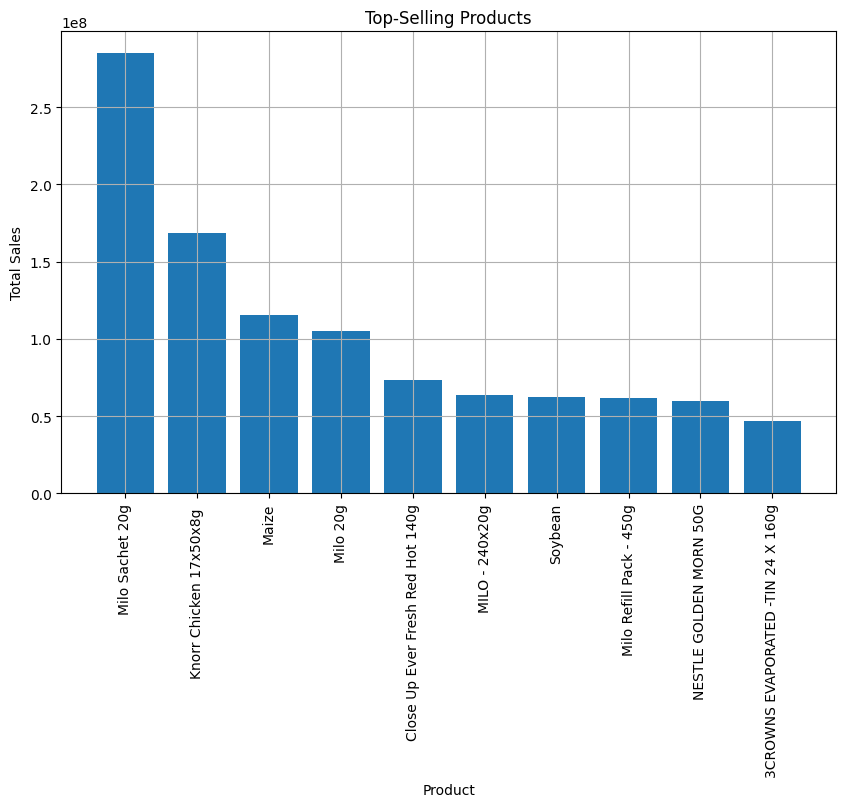

In [479]:
# Example Visualizations in Python Using Matplotlib
import matplotlib.pyplot as plt

# Sales Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Order Date'], sales_by_date['Total Price'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.grid(True)
plt.show()

# Sales by Branch
sales_by_branch = data.groupby('Branch Location')['Total Price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(sales_by_branch['Branch Location'], sales_by_branch['Total Price'])
plt.xlabel('Branch Location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Branch Location')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Top-Selling Products
plt.figure(figsize=(10, 6))
plt.bar(top_products['Item Name'][:10], top_products['Total Price'][:10])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top-Selling Products')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


CONCLUSION


The data analysis reveals key sales trends, highlighting top-performing products and regions. Strategic recommendations include focusing on high-demand items and optimizing regional operations. Implementing these insights will drive informed decision-making, enhance sales performance, and support business growth in targeted areas. Continued analysis is recommended for ongoing optimization.